Using selected questions from the 2012 and 2014 editions of the European Social Survey, http://www.europeansocialsurvey.org/data/round-index.html
address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv
And here is the codebook, https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html
with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

year: 2012 = 6;  2014 = 7

    1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
    2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
    3. Who reported watching more TV in 2012, men or women?
    4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
    5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
    6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

Submit a link to your work below.

##### note:
Using dependent groups:
    - use paired t-test
    - if data missing in one group must be discarded in the other group

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline


In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [4]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [6]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

##### note:
will drop missing values except for age & gender

In [10]:
df = df.dropna()

In [21]:
df['year'] = df['year'].map({6: '2012', 7: '2014'})

In [22]:
df.head(8)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
6,CH,40.0,2012,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,1.0
7,CH,41.0,2012,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,1.0
8,CH,51.0,2012,2.0,8.0,8.0,8.0,9.0,6.0,4.0,2.0,84.0,2.0


In [23]:
df.describe()

,idno,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.147000e+03,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000
mean,4.022622e+04,3.818584,5.574936,6.005155,5.321468,7.708482,5.215908,2.755984,1.496379,47.262182,1.384681
std,6.320721e+05,2.008937,2.215745,2.120127,2.166217,1.720839,1.438792,0.901406,0.500018,18.316890,0.486550
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.063000e+03,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.749000e+03,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.778000e+03,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,61.000000,2.000000
max,1.100143e+07,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [24]:
df.groupby('cntry').describe()

idno                                                                 \
        count          mean          std         min         25%         50%   
cntry                                                                          
CH     1475.0  1.469243e+03   838.119551         5.0       748.0      1409.0   
CZ     1207.0  1.449925e+03   368.653574      1001.0      1172.0      1344.0   
DE       27.0  1.100049e+07   501.543203  11000031.0  11000091.0  11000291.0   
ES     2292.0  1.471413e+03   819.752109         1.0       812.0      1454.5   
NO     1420.0  1.429086e+04  4681.797196      6312.0     10306.5     14190.0   
SE     1726.0  1.811748e+03  1093.560533         7.0       878.5      1671.0   

                                tvtot                                          \
              75%         max   count      mean       std  min  25%  50%  75%   
cntry                                                                           
CH         2236.0      2905.0  1475.0  3.075932  1.902561  0.0  2.0  3.0  4.0   
CZ         1502.0      2151.0  1207.0  4.871582  1.954519  0.0  4.0  5.0  7.0   
DE     11000971.0  11001431.0    27.0  3.962963  2.311867  0.0  2.0  4.0  6.0   
ES         2183.5      2865.0  2292.0  3.934119  2.029577  0.0  2.0  4.0  6.0   
NO        18552.0     22428.0  1420.0  3.741549  1.903624  0.0  2.0  4.0  5.0   
SE         2790.0      3746.0  1726.0  3.624565  1.858583  0.0  2.0  4.0  5.0   

           ppltrst                                               pplfair  \
       max   count      mean       std  min  25%  50%  75%   max   count   
cntry                                                                      
CH     7.0  1475.0  5.725424  2.110547  0.0  5.0  6.0  7.0  10.0  1475.0   
CZ     7.0  1207.0  4.379453  2.355652  0.0  3.0  4.0  6.0  10.0  1207.0   
DE     7.0    27.0  5.222222  2.063107  2.0  4.0  5.0  7.0  10.0    27.0   
ES     7.0  2292.0  5.034904  2.141768  0.0  4.0  5.0  7.0  10.0  2292.0   
NO     7.0  1420.0  6.623944  1.787748  0.0  5.0  7.0  8.0  10.0  1420.0   
SE     7.0  1726.0  6.141947  2.019072  0.0  5.0  7.0  8.0  10.0  1726.0   

                                                     pplhlp            \
           mean       std  min  25%  50%  75%   max   count      mean   
cntry                                                                   
CH     6.267797  1.994092  0.0  5.0  7.0  8.0  10.0  1475.0  5.685424   
CZ     4.909693  2.186411  0.0  3.0  5.0  7.0  10.0  1207.0  4.457332   
DE     6.222222  1.908147  2.0  5.0  7.0  7.0  10.0    27.0  5.444444   
ES     5.365620  2.151569  0.0  4.0  5.0  7.0  10.0  2292.0  4.546248   
NO     6.888732  1.723367  0.0  6.0  7.0  8.0  10.0  1420.0  6.043662   
SE     6.665701  1.821627  0.0  5.0  7.0  8.0  10.0  1726.0  6.048088   

                                            happy                           \
            std  min  25%  50%  75%   max   count      mean       std  min   
cntry                                                                        
CH     1.994912  0.0  4.0  6.0  7.0  10.0  1475.0  8.113220  1.402675  0.0   
CZ     2.207621  0.0  3.0  5.0  6.0  10.0  1207.0  6.856669  1.979623  0.0   
DE     1.987138  2.0  4.5  5.0  7.0  10.0    27.0  7.592593  1.474378  4.0   
ES     2.233050  0.0  3.0  5.0  6.0  10.0  2292.0  7.504799  1.867144  0.0   
NO     1.849003  0.0  5.0  6.0  7.0  10.0  1420.0  8.085915  1.518855  0.0   
SE     1.861433  0.0  5.0  6.0  7.0  10.0  1726.0  7.920046  1.461975  1.0   

                           sclmeet                                          \
       25%  50%  75%   max   count      mean       std  min  25%  50%  75%   
cntry                                                                        
CH     7.0  8.0  9.0  10.0  1475.0  5.149831  1.312162  1.0  4.0  6.0  6.0   
CZ     5.0  7.0  8.0  10.0  1207.0  4.613090  1.553980  1.0  4.0  5.0  6.0   
DE     7.0  8.0  8.0  10.0    27.0  4.666667  0.919866  3.0  4.0  5.0  5.0   
ES     7.0  8.0  9.0  10.0  2292.0  5.242583

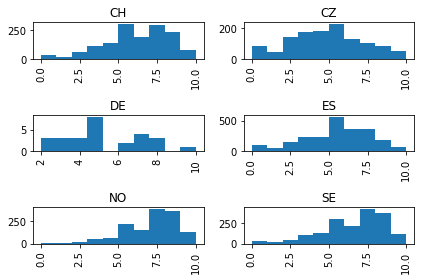

In [47]:
df['ppltrst'].hist(by=df['cntry'])
plt.tight_layout()
plt.show()

In [25]:
df.groupby(['cntry', 'year']).describe()

idno                                                      \
             count          mean          std         min          25%   
cntry year                                                               
CH    2012   732.0  1.467408e+03   836.564475         5.0       747.75   
      2014   743.0  1.471051e+03   840.208386         5.0       752.50   
CZ    2012   601.0  1.449604e+03   369.286528      1001.0      1172.00   
      2014   606.0  1.450243e+03   368.329567      1001.0      1172.25   
DE    2012    13.0  1.100050e+07   516.645988  11000031.0  11000091.00   
      2014    14.0  1.100048e+07   506.292818  11000031.0  11000101.00   
ES    2012  1158.0  1.479398e+03   820.766706         1.0       818.75   
      2014  1134.0  1.463258e+03   818.996448         1.0       799.75   
NO    2012   708.0  1.429976e+04  4694.776254      6312.0     10279.50   
      2014   712.0  1.428201e+04  4672.138894      6312.0     10327.50   
SE    2012   859.0  1.817258e+03  1093.657060         7.0       883.00   
      2014   867.0  1.806288e+03  1094.068745         7.0       866.50   

                                                  tvtot                      \
                   50%          75%         max   count      mean       std   
cntry year                                                                    
CH    2012      1403.0      2236.25      2905.0   732.0  3.124317  1.906748   
      2014      1410.0      2232.50      2905.0   743.0  3.028264  1.898505   
CZ    2012      1343.0      1504.00      2151.0   601.0  5.098170  1.859753   
      2014      1345.5      1499.75      2151.0   606.0  4.646865  2.020731   
DE    2012  11000291.0  11000971.00  11001431.0    13.0  4.923077  2.215910   
      2014  11000271.0  11000833.50  11001431.0    14.0  3.071429  2.092635   
ES    2012      1469.0      2188.75      2865.0  1158.0  3.924007  2.054426   
      2014      1443.5      2178.00      2865.0  1134.0  3.944444  2.004738   
NO    2012     14328.0     18582.00     22428.0   708.0  3.798023  1.893978   
      2014     14154.0     18508.50     22428.0   712.0  3.685393  1.912844   
SE    2012      1705.0      2795.00      3746.0   859.0  3.674040  1.821502   
      2014      1660.0      2784.00      3746.0   867.0  3.575548  1.894383   

                                     ppltrst                                 \
            min   25%  50%  75%  max   count      mean       std  min   25%   
cntry year                                                                    
CH    2012  0.0  2.00  3.0  4.0  7.0   732.0  5.685792  2.102611  0.0  4.00   
      2014  0.0  2.00  3.0  4.0  7.0   743.0  5.764468  2.119026  0.0  5.00   
CZ    2012  0.0  4.00  6.0  7.0  7.0   601.0  4.402662  2.402969  0.0  3.00   
      2014  0.0  3.00  5.0  7.0  7.0   606.0  4.356436  2.309524  0.0  3.00   
DE    2012  1.0  4.00  6.0  7.0  7.0    13.0  5.076923  1.497862  3.0  4.00   
      2014  0.0  1.25  3.0  4.0  7.0    14.0  5.357143  2.530039  2.0  3.25   
ES    2012  0.0  2.00  4.0  6.0  7.0  1158.0  5.127807  2.161797  0.0  4.00   
      2014  0.0  2.00  4.0  6.0  7.0  1134.0  4.940035  2.117869  0.0  3.00   
NO    2012  0.0  2.00  4.0  5.0  7.0   708.0  6.648305  1.755745  0.0  5.00   
      2014  0.0  2.00  4.0  5.0  7.0   712.0  6.599719  1.819924  0.0  5.00   
SE    2012  0.0  2.00  4.0  5.0  7.0   859.0  6.043073  2.028758  0.0  5.00   
      2014  0.0  2.00  4.0  5.0  7.0   867.0  6.239908  2.005794  0.0  5.00   

                            pplfair                                          \
            50%   75%   max   count      mean       std  min  25%  50%  75%   
cntry year                                                                    
CH    2012  6.0  7.00  10.0   732.0  6.333333  1.964342  0.0  5.0  7.0  8.0   
      2014  6.0  7.00  10.0   743.0  6.203230  2.022219  0.0  5.0  7.0  8.0   
CZ    2012  4.0  6.00  10.0   601.0  4.956739  2.208648  0.0  3.0  5.0  7.0   
      2014  5.0  6.00  10.0   606.0  4.863036  2.164947  

In [26]:
df['cntry'].nunique()

6

1. Did people become less trusting [ppltrst] from 2012 to 2014 [year]? Compute results for each country [cntry] in the sample.

0: You can't be too careful   
10: Most people can be trusted

In [39]:
df_2012 = df.loc[df['year'] == '2012']
df_2014 = df.loc[df['year'] == '2014']

In [40]:
df_2012.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [53]:
df_2012.groupby('cntry').mean()

,idno,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
cntry,,,,,,,,,,,
CH,1.467408e+03,3.124317,5.685792,6.333333,5.707650,8.083333,5.124317,2.710383,1.506831,47.241803,1.349727
CZ,1.449604e+03,5.098170,4.402662,4.956739,4.517471,6.790349,4.732113,2.617304,1.504160,46.515807,1.425957
DE,1.100050e+07,4.923077,5.076923,5.692308,5.000000,7.307692,4.923077,2.923077,1.615385,54.000000,1.384615
ES,1.479398e+03,3.924007,5.127807,5.377375,4.746114,7.557858,5.221934,2.571675,1.511226,47.505181,1.371330
NO,1.429976e+04,3.798023,6.648305,6.919492,6.097458,8.252825,5.563559,2.967514,1.474576,46.086158,1.347458
SE,1.817258e+03,3.674040,6.043073,6.513388,6.033760,7.901048,5.536671,2.911525,1.474971,48.647264,1.391153


In [57]:
cntry_list = ['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']   
yr_list = ['2012', '2014']

In [ ]:
for country in cntry_list:
    for yr in year:
        

In [49]:
trust_2012 = df_2012.groupby('cntry')['ppltrst'].mean()
trust_2012

cntry
CH    5.685792
CZ    4.402662
DE    5.076923
ES    5.127807
NO    6.648305
SE    6.043073
Name: ppltrst, dtype: float64

In [50]:
trust_2014 = df_2014.groupby('cntry')['ppltrst'].mean()
trust_2014

cntry
CH    5.764468
CZ    4.356436
DE    5.357143
ES    4.940035
NO    6.599719
SE    6.239908
Name: ppltrst, dtype: float64

KeyError: "None of [Float64Index([5.725423728813559, 4.379453189726595, 5.222222222222222,\n              5.034904013961605, 6.623943661971831, 6.141946697566628],\n             dtype='float64')] are in the [columns]"

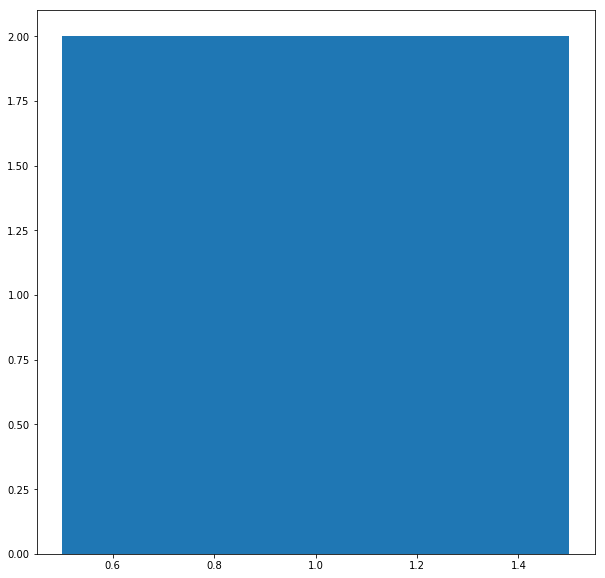

In [60]:
plt.figure(figsize=(10, 10))

color = ['cyan', 'magenta', 'yellow', 'green', 'purple', 'red']
year =  ['2012', '2014']

for yr in 'year':
    trust_data = df.groupby('cntry')['ppltrst'].mean()
    
    plt.bar(1, 2, 1)
    df.plot(x = 'cntry', y = trust_data, color = color, legend = None)
    plt.ylabel('Level of Trust')
    plt.title('2012 Level of Trust by Country')

    
    plt.bar(1, 2, 2)
    df.plot(x = 'cntry', y = trust_data , color = color, legend = None)
    plt.ylabel('Level of Trust')
    plt.title('2014 Level of Trust by Country')

plt.tight_layout()
plt.show()

In [52]:
#paired t-test
stats.ttest_rel(trust_2012,trust_2014)

Ttest_relResult(statistic=-0.6421498778612081, pvalue=0.5490555590550599)

The p-value of 0.55 indicates that there is NOT a significant difference in the level of trust 

In [ ]:
cntry

2. Did people become happier [pplhlp] from 2012 to 2014? Compute results for each country in the sample.
0: Extremely unhappy
10: Extremely happy

3. Who reported watching more TV [tvtot] in 2012, men or women [gndr] ?
 0: No time at all
 1: Less than 0,5 hour
 2: 0,5 hour to 1 hour
 3: More than 1 hour, up to 1,5 hours
 4: More than 1,5 hours, up to 2 hours
 5: More than 2 hours, up to 2,5 hours
 6: More than 2,5 hours, up to 3 hours
 7: More than 3 hours  

In [ ]:
df[df.tvtot.isnull()]

 4. Who was more likely to believe people were fair [pplfair] in 2012, people living with a partner or people living alone?
0: Most people try to take advantage of me
10: Most people try to be fair

1: Lives with husband/wife/partner at household grid
2: Does not

 5. Pick three or four of the countries in the sample and compare how often people met socially [sclmeet] in 2014. Are there differences, and if so, which countries stand out?
1: Never
2: Less than once a month
3: Once a month
4: Several times a month
5: Once a week
6: Several times a week
7: Every day

6. Pick three or four of the countries in the sample and compare how often people took part in social activities [sclact], relative to others their age, in 2014. Are there differences, and if so, which countries stand out?
1: Much less than most
2: Less than most
3: About the same
4: More than most
5: Much more than most

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [ ]:
# First, create and load some coaster height data.

coaster_heights = pd.DataFrame()

steel_heights = [
    18.5, 14, 30.2, 25.2024, 15, 16, 13.5, 30, 20, 17, 13.716, 8.5, 16.1, 18,
    41, 30.3, 32.004, 28.004, 30.48, 34
    ]

wood_heights = [
    38.70, 46, 27.8, 43.52, 33.77, 29.26, 16.764, 45, 48.1, 16.764, 24.384,
    24.5, 40, 35.96, 22.24, 21.33, 27.73, 23.46, 21.64, 30.12
    ]

plastic_heights = [
    9, 8.2, 12, 21, 6.3, 11.7, 19.44, 4.75, 13, 18, 15.5, 15.6, 10, 11.77, 29,
    5, 3.2, 14.75, 18.2, 17.7
    ]

coaster_heights['Steel'] = steel_heights
coaster_heights['Wood'] = wood_heights
coaster_heights['Plastic'] = plastic_heights

# Visualize our data.
coaster_heights.hist(sharey=True,sharex=True)
plt.show()

In [ ]:
# Printing the means for each group.
print(coaster_heights.mean())

coaster_heights.boxplot()
plt.show()


F, p = stats.f_oneway(
    coaster_heights['Steel'],
    coaster_heights['Wood'],
    coaster_heights['Plastic'])

# The F statistic. one-way ANOVA
print(F)

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.
print(p)

In [ ]:
print(stats.ttest_ind(coaster_heights['Steel'], coaster_heights['Wood']))
print(stats.ttest_ind(coaster_heights['Steel'], coaster_heights['Plastic']))
print(stats.ttest_ind(coaster_heights['Plastic'], coaster_heights['Wood']))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [ ]:
coaster_heights = pd.DataFrame()

steel_heights = [
    18.5, 14, 30.2, 25.2024, 15, 16, 13.5, 30, 20, 17, 13.716, 8.5, 16.1, 18,
    41, 30.3, 32.004, 28.004, 30.48, 34
    ]

wood_heights = [
    38.70, 46, 27.8, 43.52, 33.77, 29.26, 16.764, 45, 48.1, 16.764, 24.384,
    24.5, 40, 35.96, 22.24, 21.33, 27.73, 23.46, 21.64, 30.12
    ]

plastic_heights = [
    9, 8.2, 12, 21, 6.3, 11.7, 19.44, 4.75, 13, 18, 15.5, 15.6, 10, 11.77, 29,
    5, 3.2, 14.75, 18.2, 17.7
    ]

coaster_heights['Steel'] = steel_heights
coaster_heights['Wood'] = wood_heights
coaster_heights['Plastic'] = plastic_heights

heights=np.asarray(
    coaster_heights['Steel'].tolist() +
    coaster_heights['Wood'].tolist() +
    coaster_heights['Plastic'].tolist())

materials = np.array(['Steel', 'Wood','Plastic'])
materials = np.repeat(materials, 20)

tukey = pairwise_tukeyhsd(endog=heights,      # Data
                          groups=materials,   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [ ]:
# First, create and load some coaster height data.
roller_coasters = pd.DataFrame()

europe_heights = [
    13.5, 36, 94, 6.1, 22, 35.5, 35.5, 8, 8, 10, 8.5, 5, 30, 31, 4.5, 15, 36,
    20, 10, 30.4
    ]
latin_america_heights = [
    33.3, 35.5, 30, 32, 8.5, 60, 8, 33, 33.1, 13, 8, 22.9, 3.3, 11, 11, 19.5,
    35.1, 19.5, 4, 35.5
    ]
north_america_heights = [
    66.4, 23.7, 54.5, 22.2, 20, 1.8, 3.9, 35.3, 45.2, 51.2, 43.5, 24.3, 74.6,
    14.3, 16.1, 4.8, 38.9, 30.8, 10, 20
    ]

roller_coasters['Europe'] = europe_heights
roller_coasters['LatinAmerica'] = latin_america_heights
roller_coasters['NorthAmerica'] = north_america_heights

# Visualize our data.
roller_coasters.hist(sharey=True, sharex=True)
plt.show()


In [ ]:
# Kruskal-Wallace Test

# Join all ratings together into a list, then ranking them.
ranks = stats.rankdata(
    roller_coasters['Europe'].tolist() +
    roller_coasters['LatinAmerica'].tolist() +
    roller_coasters['NorthAmerica'].tolist())

# Add the new ranked variables to the data frame.
roller_coasters['Ranks_Europe'] = ranks[0:20]
roller_coasters['Ranks_LatinAmerica'] = ranks[20:40]
roller_coasters['Ranks_NorthAmerica'] = ranks[40:60]

# Average rank per group.
groups = ['Ranks_Europe', 'Ranks_LatinAmerica', 'Ranks_NorthAmerica']
print(roller_coasters[groups].apply(np.mean))

# Overall average rank.
print(np.mean(ranks))

# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
stats.kruskal(
    roller_coasters['Europe'],
    roller_coasters['LatinAmerica'],
    roller_coasters['NorthAmerica'])